In [319]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Data Analyzing & Preprocessing

In [241]:
data = pd.read_csv('/Users/nadianesib/Desktop/week8-doc/data/Fraud_Data.csv')
data2 = pd.read_csv('/Users/nadianesib/Desktop/week8-doc/data/creditcard.csv')
data3 = pd.read_csv('/Users/nadianesib/Desktop/week8-doc/data/IpAddress_to_Country.csv')

In [242]:
data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0


In [243]:
data2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [244]:
data3

,lower_bound_ip_address,upper_bound_ip_address,country
0,1.677722e+07,16777471,Australia
1,1.677747e+07,16777727,China
2,1.677773e+07,16778239,China
3,1.677824e+07,16779263,Australia
4,1.677926e+07,16781311,China
...,...,...,...
138841,3.758092e+09,3758093311,Hong Kong
138842,3.758093e+09,3758094335,India
138843,3.758095e+09,3758095871,China
138844,3.758096e+09,3758096127,Singapore


# Handle Missing Value

In [245]:
data.isnull().sum().sum()   #handling missing value.

0

In [246]:
data2.isnull().sum().sum()  #handling missing value.

0

In [247]:
data3.isnull().sum().sum()  #handling missing value.

0

In [248]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [249]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [250]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


# Data Cleaning

In [251]:
data.duplicated() #Remove duplicates

0         False
1         False
2         False
3         False
4         False
          ...  
151107    False
151108    False
151109    False
151110    False
151111    False
Length: 151112, dtype: bool

In [252]:
data2.duplicated()  #Remove duplicates

0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Length: 284807, dtype: bool

In [253]:
data3.duplicated()   #Remove duplicates

0         False
1         False
2         False
3         False
4         False
          ...  
138841    False
138842    False
138843    False
138844    False
138845    False
Length: 138846, dtype: bool

In [254]:
data.dtypes  #Correcting dtypes

user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
dtype: object

In [255]:
# Convert 'purchase_time' column to datetime format
data['purchase_time'] = pd.to_datetime(data['purchase_time'])
# Check the data types to ensure 'datetime' column is recognized as datetime
print(data.dtypes)


user_id                    int64
signup_time               object
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address               float64
class                      int64
dtype: object


In [256]:
data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0


In [24]:
data2.dtypes #Correcting dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [25]:
data3.dtypes #Correcting dtypes

lower_bound_ip_address    float64
upper_bound_ip_address      int64
country                    object
dtype: object

# Exploratory Data Analysis (EDA)


In [26]:
#univariate analysis

In [27]:
data.describe()

,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [257]:
data.shape

(151112, 11)

In [258]:
data.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class'],
      dtype='object')

In [39]:
print(f'user_id: {data.user_id.count()}')
print(f'purchase_value: {data.user_id.count()}')
print(f'device_id: {data.device_id.count()}')
print(f'source: {data.source.count()}')
print(f'browser: {data.browser.count()}')
print(f'sex: {data.sex.count()}')
print(f'age: {data.age.count()}')
print(f'ip_address: {data.ip_address.count()}')
print(f'pdate: {data.pdate.count()}')
print(f'ptime: {data.ptime.count()}')
print(f'sdate: {data.sdate.count()}')
print(f'stime: {data.stime.count()}')
print(f'class: {data["class"].count()}')

user_id: 151112
purchase_value: 151112
device_id: 151112
source: 151112
browser: 151112
sex: 151112
age: 151112
ip_address: 151112
pdate: 151112
ptime: 151112
sdate: 151112
stime: 151112
class: 151112


In [262]:
print(f'user_id: {data.user_id.nunique()}')
print(f'purchase_value: {data.user_id.nunique()}')
print(f'device_id: {data.device_id.nunique()}')
print(f'source: {data.source.nunique()}')
print(f'browser: {data.browser.nunique()}')
print(f'sex: {data.sex.nunique()}')
print(f'age: {data.age.nunique()}')
print(f'ip_address: {data.ip_address.nunique()}')
print(f':purchase_time {data.purchase_time.nunique()}')
print(f':signup_time {data.signup_time.nunique()}')
print(f'class: {data["class"].nunique()}')


user_id: 151112
purchase_value: 151112
device_id: 137956
source: 3
browser: 5
sex: 2
age: 58
ip_address: 143512
:purchase_time 150679
:signup_time 151112
class: 2


 Analyzing a numerical variable

In [77]:
m = 'user_id'
print(f"Mean: {data[m].mean()}")
print(f"Median: {data[m].median()}")
print(f"Standard Deviation: {data[m].std()}")
print(f"Minimum: {data[m].min()}")
print(f"Maximum: {data[m].max()}")


Mean: 200171.04096961193
Median: 199958.0
Standard Deviation: 115369.28502413459
Minimum: 2
Maximum: 400000


In [52]:
x = 'purchase_value'
print(f"Mean: {data[x].mean()}")
print(f"Median: {data[x].median()}")
print(f"Standard Deviation: {data[x].std()}")
print(f"Minimum: {data[x].min()}")
print(f"Maximum: {data[x].max()}")

Mean: 36.93537243898565
Median: 35.0
Standard Deviation: 18.322762148660615
Minimum: 9
Maximum: 154


In [53]:
y = 'age'
print(f"Mean: {data[y].mean()}")
print(f"Median: {data[y].median()}")
print(f"Standard Deviation: {data[y].std()}")
print(f"Minimum: {data[y].min()}")
print(f"Maximum: {data[y].max()}")

Mean: 33.14070358409656
Median: 33.0
Standard Deviation: 8.617733490959177
Minimum: 18
Maximum: 76


In [54]:
z = 'class'
print(f"Mean: {data[z].mean()}")
print(f"Median: {data[z].median()}")
print(f"Standard Deviation: {data[z].std()}")
print(f"Minimum: {data[z].min()}")
print(f"Maximum: {data[z].max()}")

Mean: 0.09364577267192546
Median: 0.0
Standard Deviation: 0.29133623807208336
Minimum: 0
Maximum: 1


In [45]:
numerical_variable = 'ip_address'
print(f"Mean: {data[numerical_variable].mean()}")
print(f"Median: {data[numerical_variable].median()}")
print(f"Standard Deviation: {data[numerical_variable].std()}")
print(f"Minimum: {data[numerical_variable].min()}")
print(f"Maximum: {data[numerical_variable].max()}")

Mean: 2152145330.958826
Median: 2154770162.40662
Standard Deviation: 1248497030.1004274
Minimum: 52093.4968949854
Maximum: 4294850499.67884


# Visualizing Data use plots to visualize the distribution of the numerical variable.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


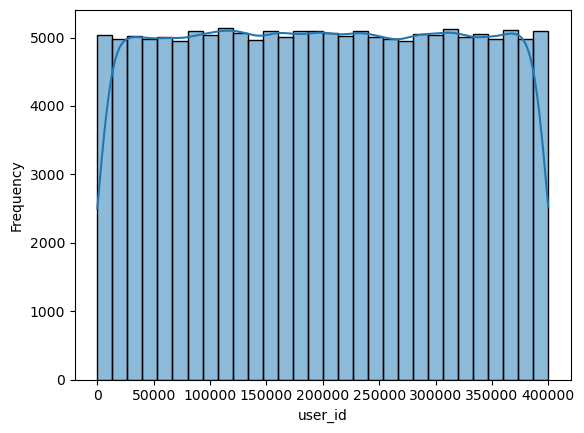

In [78]:
sns.histplot(data[m], bins=30, kde=True)
plt.xlabel(m)
plt.ylabel('Frequency')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


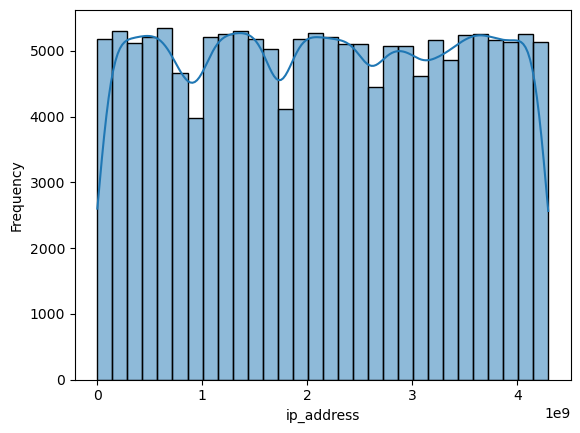

In [60]:
sns.histplot(data[numerical_variable], bins=30, kde=True)
plt.xlabel(numerical_variable)
plt.ylabel('Frequency')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


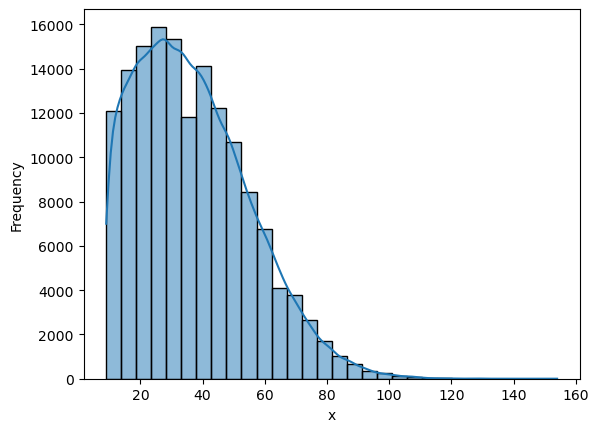

In [59]:
sns.histplot(data[x], bins=30, kde=True)
plt.xlabel('x')
plt.ylabel('Frequency')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


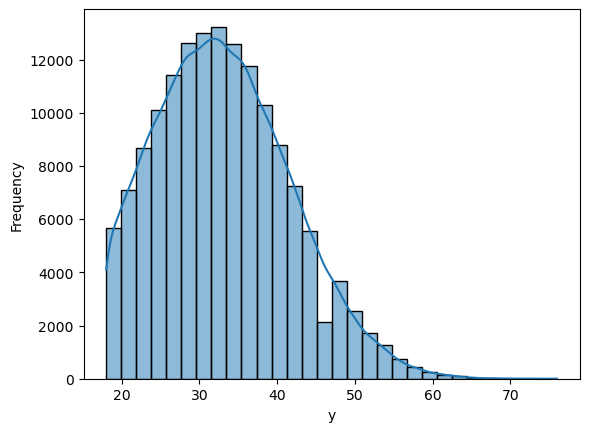

In [61]:
sns.histplot(data[y], bins=30, kde=True)
plt.xlabel('y')
plt.ylabel('Frequency')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


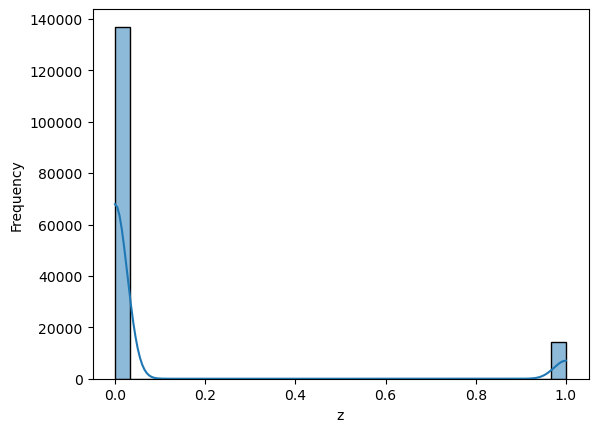

In [63]:
sns.histplot(data[z], bins=30, kde=True)
plt.xlabel('z')
plt.ylabel('Frequency')
plt.show()

# Analyzing categorical variables

In [263]:
data.dtypes

user_id                    int64
signup_time               object
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address               float64
class                      int64
dtype: object

In [264]:
categorical_variable = 'device_id'
print(data[categorical_variable].value_counts())

device_id
CQTUVBYIWWWBC    20
ITUMJCKWEYNDD    20
EQYVNEGOFLAWK    20
ZUSVMDEZRBDTX    20
NGQCKIADMZORL    20
                 ..
VRDEFBOZCVCWC     1
CQWVTDFLPYXDD     1
PFOWYANPWVSTK     1
PAFKVSXDFXINE     1
ZINIADFCLHYPG     1
Name: count, Length: 137956, dtype: int64


In [265]:
categorical_variable2 = 'source'
print(data[categorical_variable2].value_counts())

source
SEO       60615
Ads       59881
Direct    30616
Name: count, dtype: int64


In [266]:
categorical_variable3 = 'browser'
print(data[categorical_variable3].value_counts())

browser
Chrome     61432
IE         36727
Safari     24667
FireFox    24610
Opera       3676
Name: count, dtype: int64


In [267]:
categorical_variable4 = 'sex'
print(data[categorical_variable4].value_counts())

sex
M    88293
F    62819
Name: count, dtype: int64


In [272]:
categorical_variable6 = 'purchase_time'
print(data[categorical_variable6].value_counts())

purchase_time
2015-06-08 09:42:04    3
2015-07-17 23:22:55    3
2015-09-10 09:04:53    3
2015-07-31 09:02:55    2
2015-08-25 14:00:15    2
                      ..
2015-10-13 16:29:20    1
2015-02-19 13:40:15    1
2015-09-07 09:37:52    1
2015-05-17 00:22:27    1
2015-07-21 02:03:53    1
Name: count, Length: 150679, dtype: int64


In [274]:
categorical_variable8 = 'signup_time'
print(data[categorical_variable8].value_counts())

signup_time
2015-02-24 22:55:49    1
2015-03-29 18:25:39    1
2015-07-17 17:19:15    1
2015-03-30 03:33:20    1
2015-05-28 09:37:05    1
                      ..
2015-04-02 06:55:03    1
2015-04-15 10:48:29    1
2015-07-27 03:45:16    1
2015-07-16 21:04:30    1
2015-06-10 07:02:20    1
Name: count, Length: 151112, dtype: int64


# Visualizing Data Use plots to visualize the distribution of the categorical variable.

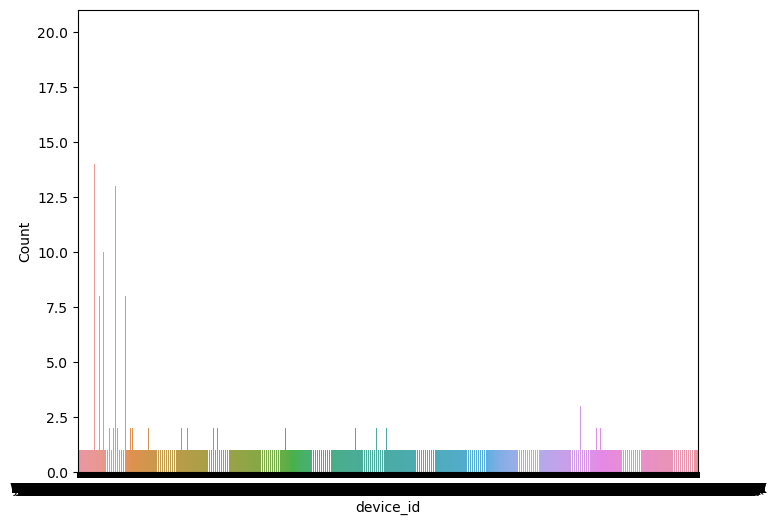

In [275]:
plt.figure(figsize=(8, 6))
sns.countplot(x =categorical_variable, data=data)
plt.xlabel(categorical_variable)
plt.ylabel('Count')
plt.show()

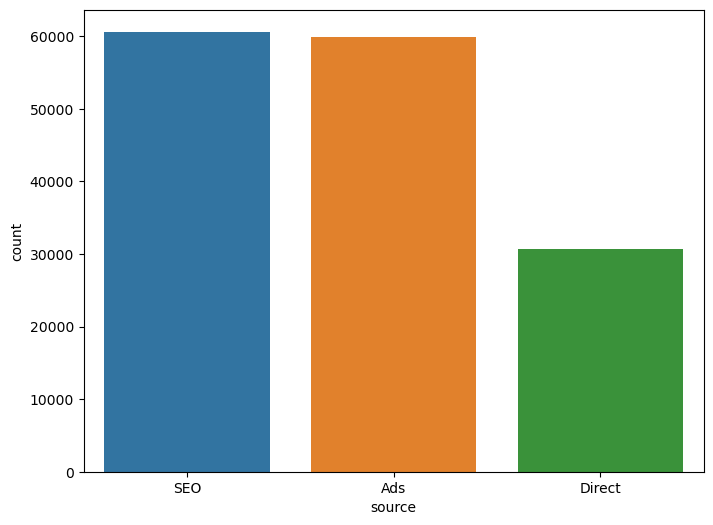

In [276]:
plt.figure(figsize=(8, 6))
sns.countplot(x=categorical_variable2, data=data)
plt.xlabel(categorical_variable2)
plt.ylabel('count')
plt.show()

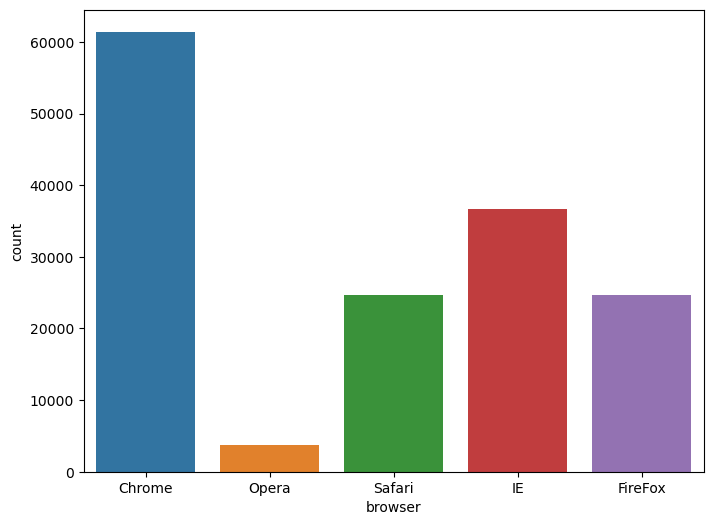

In [277]:
plt.figure(figsize=(8, 6))
sns.countplot(x=categorical_variable3, data=data)
plt.xlabel(categorical_variable3)
plt.ylabel('count')
plt.show()

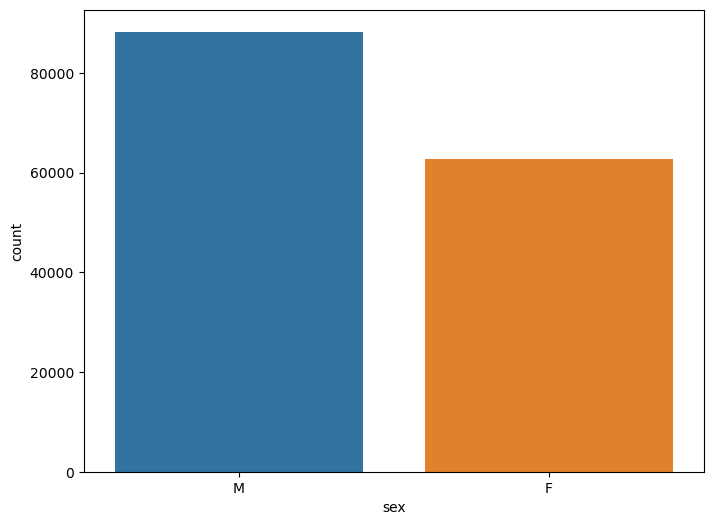

In [278]:
plt.figure(figsize=(8, 6))
sns.countplot(x=categorical_variable4, data=data)
plt.xlabel(categorical_variable4)
plt.ylabel('count')
plt.show()

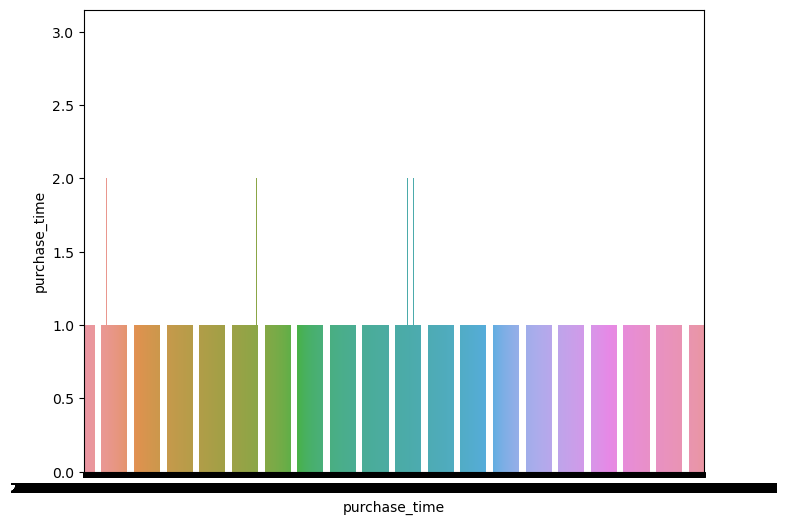

In [282]:
plt.figure(figsize=(8, 6))
sns.countplot(x=categorical_variable6, data=data)
plt.xlabel(categorical_variable6)
plt.ylabel('purchase_time')
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x=categorical_variable8, data=data)
plt.xlabel(categorical_variable8)
plt.ylabel('time')
plt.show()

# univariate analaysis for data set 2

In [ ]:
data2.describe()

In [ ]:
data2.shape

In [ ]:
data2.columns

In [ ]:
print(f'Time: {data2.Time.count()}')
print(f':Amount {data2.Amount.count()}')
print(f'Class: {data2.Class.count()}')

In [75]:
print(f'Time: {data2.Time.nunique()}')
print(f':Amount {data2.Amount.nunique()}')
print(f'Class: {data2.Class.nunique()}')

Time: 124592
:Amount 32767
Class: 2


# Analyzing a numerical variable for dataset2

In [80]:
n = 'Time'
print(f"Mean: {data2[n].mean()}")
print(f"Median: {data2[n].median()}")
print(f"Standard Deviation: {data2[n].std()}")
print(f"Minimum: {data2[n].min()}")
print(f"Maximum: {data2[n].max()}")


Mean: 94813.85957508067
Median: 84692.0
Standard Deviation: 47488.14595456582
Minimum: 0.0
Maximum: 172792.0


In [81]:
k = 'Amount'
print(f"Mean: {data2[k].mean()}")
print(f"Median: {data2[k].median()}")
print(f"Standard Deviation: {data2[k].std()}")
print(f"Minimum: {data2[k].min()}")
print(f"Maximum: {data2[k].max()}")

Mean: 88.34961925093133
Median: 22.0
Standard Deviation: 250.1201092402221
Minimum: 0.0
Maximum: 25691.16


In [82]:
g = 'Class'
print(f"Mean: {data2[g].mean()}")
print(f"Median: {data2[g].median()}")
print(f"Standard Deviation: {data2[g].std()}")
print(f"Minimum: {data2[g].min()}")
print(f"Maximum: {data2[g].max()}")

Mean: 0.001727485630620034
Median: 0.0
Standard Deviation: 0.0415271896355952
Minimum: 0
Maximum: 1


# Visualizing Data set 2 Use plots to visualize the distribution of the numerical variable.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


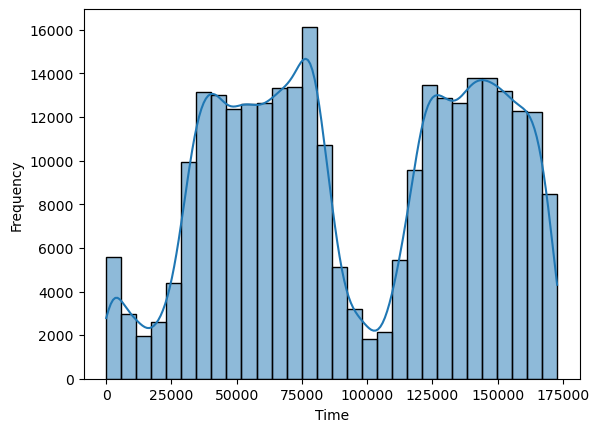

In [83]:
sns.histplot(data2[n], bins=30, kde=True)
plt.xlabel(n)
plt.ylabel('Frequency')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


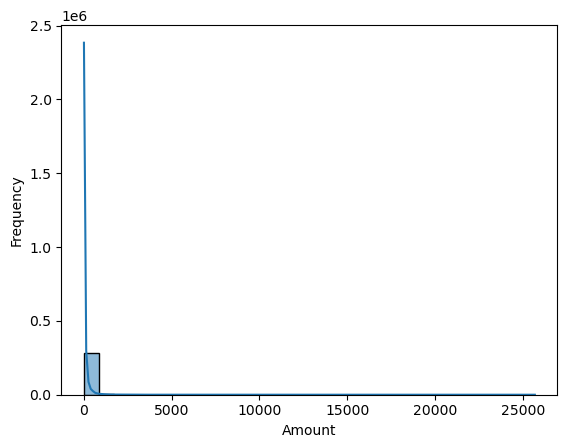

In [85]:
sns.histplot(data2[k], bins=30, kde=True)
plt.xlabel(k)
plt.ylabel('Frequency')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


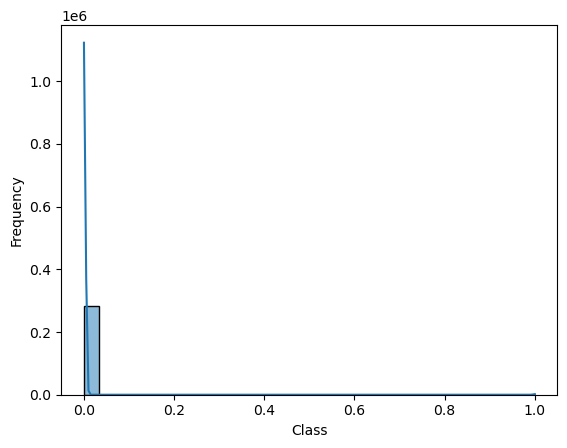

In [86]:
sns.histplot(data2[g], bins=30, kde=True)
plt.xlabel(g)
plt.ylabel('Frequency')
plt.show()

In [128]:
data2.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

 # Analyzing categorical variables for dataset 2

In [ ]:
# There is no cat variable.

In [192]:
#Univariate analaysis for dataset 3

In [87]:
data3.describe()

,lower_bound_ip_address,upper_bound_ip_address
count,1.388460e+05,1.388460e+05
mean,2.724532e+09,2.724557e+09
std,8.975215e+08,8.974979e+08
min,1.677722e+07,1.677747e+07
25%,1.919930e+09,1.920008e+09
50%,3.230887e+09,3.230888e+09
75%,3.350465e+09,3.350466e+09
max,3.758096e+09,3.758096e+09


In [89]:
data3.shape

(138846, 3)

In [96]:
data3.columns

Index(['lower_bound_ip_address', 'upper_bound_ip_address', 'country'], dtype='object')

In [97]:
print(f'e:lower_bound_ip_address {data3.lower_bound_ip_address.count()}')
print(f':upper_bound_ip_address {data3.upper_bound_ip_address.count()}')

e:lower_bound_ip_address 138846
:upper_bound_ip_address 138846


In [99]:
print(f':lower_bound_ip_address {data3.lower_bound_ip_address.nunique()}')
print(f':upper_bound_ip_address {data3.upper_bound_ip_address.nunique()}')


:lower_bound_ip_address 138846
:upper_bound_ip_address 138846


# Analyzing a numerical variable for Data set 3

In [101]:
o = 'lower_bound_ip_address'
print(f"Mean: {data3[o].mean()}")
print(f"Median: {data3[o].median()}")
print(f"Standard Deviation: {data3[o].std()}")
print(f"Minimum: {data3[o].min()}")
print(f"Maximum: {data3[o].max()}")

Mean: 2724531562.515996
Median: 3230887296.0
Standard Deviation: 897521519.7116138
Minimum: 16777216.0
Maximum: 3758096128.0


In [103]:
p = 'upper_bound_ip_address'
print(f"Mean: {data3[p].mean()}")
print(f"Median: {data3[p].median()}")
print(f"Standard Deviation: {data3[p].std()}")
print(f"Minimum: {data3[p].min()}")
print(f"Maximum: {data3[p].max()}")

Mean: 2724557062.218357
Median: 3230887551.0
Standard Deviation: 897497915.460137
Minimum: 16777471
Maximum: 3758096383


# Visualizing Data Use plots to visualize the distribution of the numerical variable.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


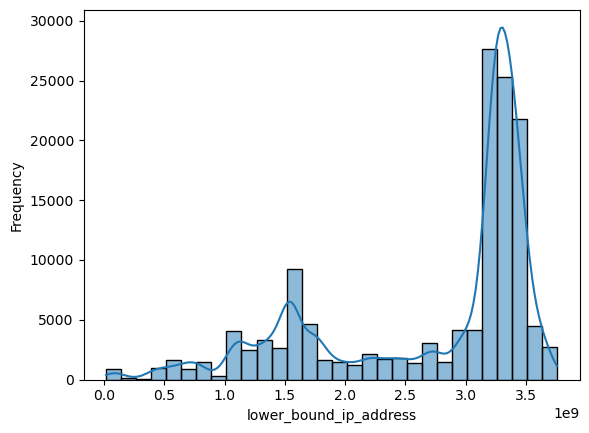

In [105]:
sns.histplot(data3[o], bins=30, kde=True)
plt.xlabel(o)
plt.ylabel('Frequency')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


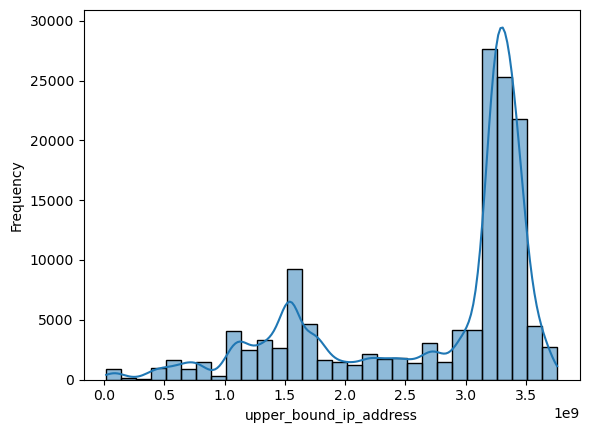

In [106]:
sns.histplot(data3[p], bins=30, kde=True)
plt.xlabel(p)
plt.ylabel('Frequency')
plt.show()

# Analyzing categorical variables

In [171]:
cat_var = 'country'
print(data3[cat_var].value_counts())

country
United States                            46868
Canada                                    6989
Russian Federation                        6739
Australia                                 6316
Germany                                   5999
                                         ...  
Timor-leste                                  1
Korea Democratic People's Republic of        1
St. Pierre and Miquelon                      1
Tokelau                                      1
Saint Lucia                                  1
Name: count, Length: 235, dtype: int64


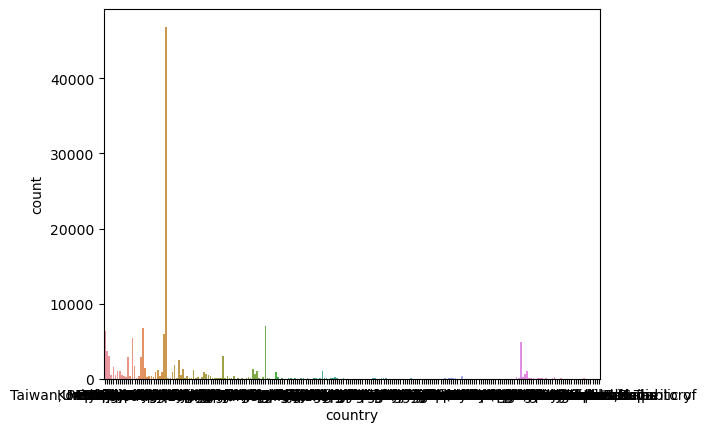

In [172]:
sns.countplot(x=cat_var, data=data3)
plt.xlabel(cat_var)
plt.ylabel('count')
plt.show()

# Bivariant Analysis

# using scatter plot

In [194]:
data.dtypes

user_id             int64
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
pdate              object
ptime              object
sdate              object
stime              object
dtype: object

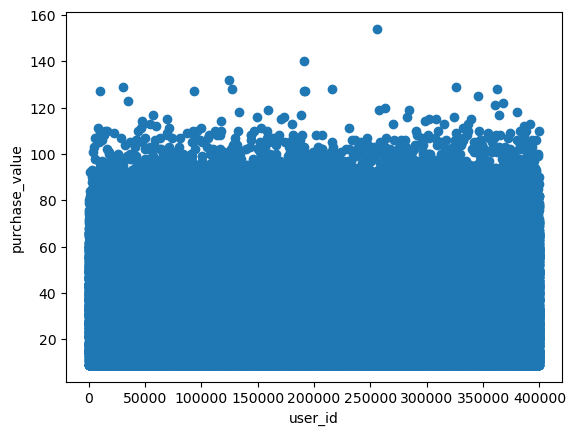

In [176]:
plt.scatter(data['user_id'], data['purchase_value'])
plt.xlabel('user_id')
plt.ylabel('purchase_value')
plt.show()

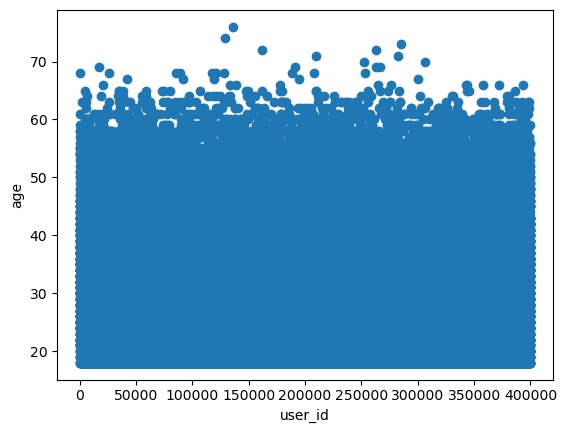

In [177]:
plt.scatter(data['user_id'], data['age'])
plt.xlabel('user_id')
plt.ylabel('age')
plt.show()

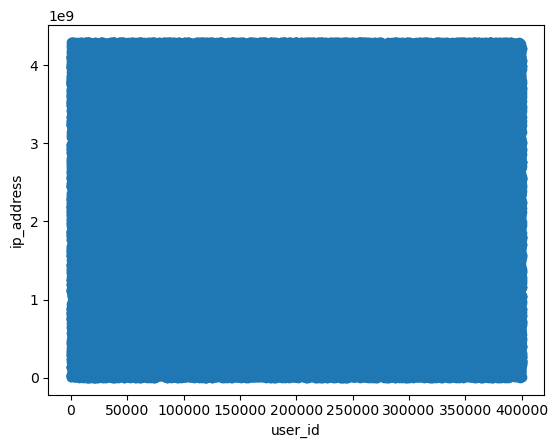

In [179]:
plt.scatter(data['user_id'], data['ip_address'])
plt.xlabel('user_id')
plt.ylabel('ip_address')
plt.show()

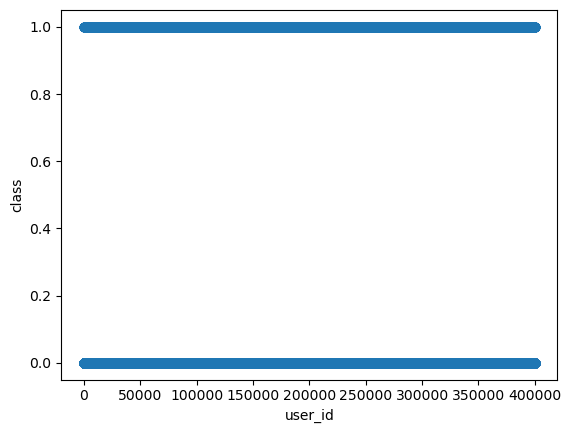

In [180]:
plt.scatter(data['user_id'], data['class'])
plt.xlabel('user_id')
plt.ylabel('class')
plt.show()

# Using Correlation Coefficient for dataset "data"

In [181]:
data.dtypes

user_id             int64
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
pdate              object
ptime              object
sdate              object
stime              object
dtype: object

In [182]:
correlation = data['user_id'].corr(data['purchase_value'])
print(f"Pearson correlation coefficient: {correlation}")

Pearson correlation coefficient: 0.0026170173527689878


In [183]:
correlation = data['user_id'].corr(data['age'])
print(f"Pearson correlation coefficient: {correlation}")

Pearson correlation coefficient: 0.0006108277317292344


In [184]:
correlation = data['user_id'].corr(data['ip_address'])
print(f"Pearson correlation coefficient: {correlation}")

Pearson correlation coefficient: -0.003144319098690181


In [185]:
correlation = data['user_id'].corr(data['class'])
print(f"Pearson correlation coefficient: {correlation}")

Pearson correlation coefficient: 0.0019448089486209447


# Using scatter plot for dataset 2

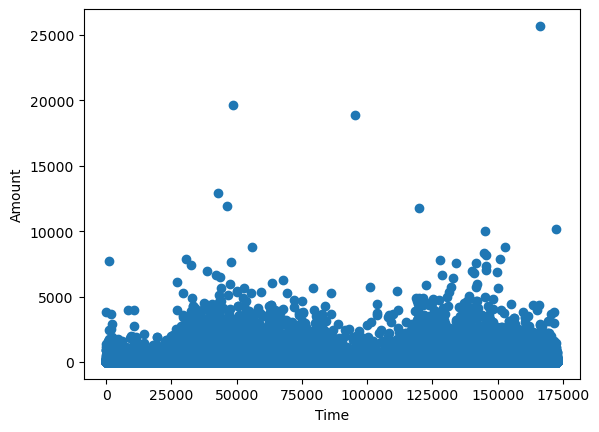

In [197]:
plt.scatter(data2['Time'], data2['Amount'])
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

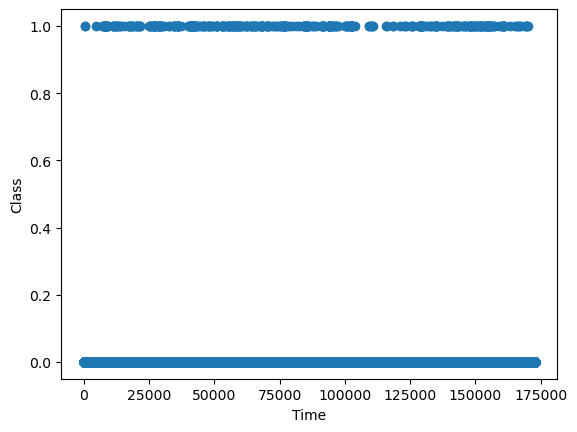

In [199]:
plt.scatter(data2['Time'], data2['Class'])
plt.xlabel('Time')
plt.ylabel('Class')
plt.show()

# Using Correlation Coefficient for dataset "data 2"

In [195]:
correlation = data2['Time'].corr(data2['Amount'])
print(f"Pearson correlation coefficient: {correlation}")

Pearson correlation coefficient: -0.01059637338902923


# Using scatter plot for dataset 3

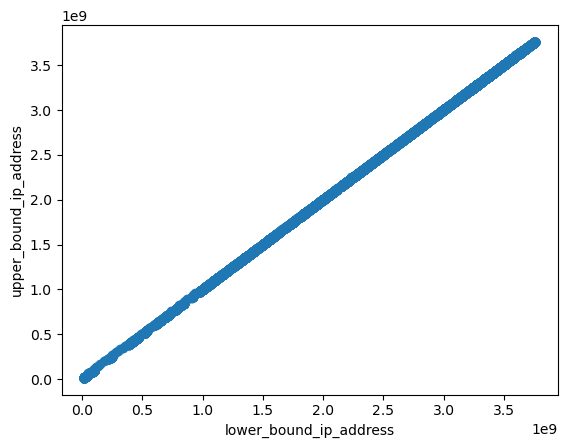

In [202]:
plt.scatter(data3['lower_bound_ip_address'], data3['upper_bound_ip_address'])
plt.xlabel('lower_bound_ip_address')
plt.ylabel('upper_bound_ip_address')
plt.show()

# Using Correlation Coefficient for dataset "data 2"

In [204]:
orrelation = data3['lower_bound_ip_address'].corr(data3['upper_bound_ip_address'])
print(f"Pearson correlation coefficient: {correlation}")

Pearson correlation coefficient: -0.01059637338902923


# Merge Datasets for Geolocation Analysis


In [205]:
#Convert IP addresses to integer format

In [206]:
data

,user_id,purchase_value,device_id,source,browser,sex,age,ip_address,class,pdate,ptime,sdate,stime
0,22058,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,2015-04-18,02:47:11,2015-02-24,22:55:49
1,333320,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,2015-06-08,01:38:54,2015-06-07,20:39:50
2,1359,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,2015-01-01,18:52:45,2015-01-01,18:52:44
3,150084,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,2015-05-04,13:54:50,2015-04-28,21:13:25
4,221365,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,2015-09-09,18:40:53,2015-07-21,07:09:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1,2015-03-29,00:30:47,2015-01-27,03:03:34
151108,274471,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0,2015-05-26,12:24:39,2015-05-15,17:43:29
151109,368416,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0,2015-05-20,07:07:47,2015-03-03,23:07:31
151110,207709,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0,2015-09-07,09:34:46,2015-07-09,20:06:07


In [207]:
data.ip_address

0         7.327584e+08
1         3.503114e+08
2         2.621474e+09
3         3.840542e+09
4         4.155831e+08
              ...     
151107    3.451155e+09
151108    2.439047e+09
151109    2.748471e+09
151110    3.601175e+09
151111    4.103825e+09
Name: ip_address, Length: 151112, dtype: float64

In [210]:
data['ip_address'] = data['ip_address'].astype(int)

In [211]:
data.ip_address

0          732758368
1          350311387
2         2621473820
3         3840542443
4          415583117
             ...    
151107    3451154526
151108    2439047221
151109    2748470523
151110    3601174708
151111    4103824510
Name: ip_address, Length: 151112, dtype: int64

In [212]:
data

,user_id,purchase_value,device_id,source,browser,sex,age,ip_address,class,pdate,ptime,sdate,stime
0,22058,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,2015-04-18,02:47:11,2015-02-24,22:55:49
1,333320,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,2015-06-08,01:38:54,2015-06-07,20:39:50
2,1359,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,2015-01-01,18:52:45,2015-01-01,18:52:44
3,150084,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0,2015-05-04,13:54:50,2015-04-28,21:13:25
4,221365,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,2015-09-09,18:40:53,2015-07-21,07:09:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3451154526,1,2015-03-29,00:30:47,2015-01-27,03:03:34
151108,274471,35,LYSFABUCPCGBA,SEO,Safari,M,32,2439047221,0,2015-05-26,12:24:39,2015-05-15,17:43:29
151109,368416,40,MEQHCSJUBRBFE,SEO,IE,F,26,2748470523,0,2015-05-20,07:07:47,2015-03-03,23:07:31
151110,207709,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3601174708,0,2015-09-07,09:34:46,2015-07-09,20:06:07


In [213]:
data3

,lower_bound_ip_address,upper_bound_ip_address,country
0,1.677722e+07,16777471,Australia
1,1.677747e+07,16777727,China
2,1.677773e+07,16778239,China
3,1.677824e+07,16779263,Australia
4,1.677926e+07,16781311,China
...,...,...,...
138841,3.758092e+09,3758093311,Hong Kong
138842,3.758093e+09,3758094335,India
138843,3.758095e+09,3758095871,China
138844,3.758096e+09,3758096127,Singapore


In [217]:
data3['lower_bound_ip_address'] = data3['lower_bound_ip_address'].astype(int)

In [218]:
data3['upper_bound_ip_address'] = data3['upper_bound_ip_address'].astype(int)

In [219]:
data3

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777471,16777471,Australia
1,16777727,16777727,China
2,16778239,16778239,China
3,16779263,16779263,Australia
4,16781311,16781311,China
...,...,...,...
138841,3758093311,3758093311,Hong Kong
138842,3758094335,3758094335,India
138843,3758095871,3758095871,China
138844,3758096127,3758096127,Singapore


In [220]:
#Merge Fraud_Data.csv with IpAddress_to_Country.csv in our case dataset "data & data3"

In [235]:
merged_df = pd.merge(data1, data3, left_on='user_id', 'purchase_value', 'device_id', 'source', 'browser', 'sex',
       'age', 'ip_address', 'class', 'pdate', 'ptime', 'sdate', 'stime', right_on = 'lower_bound_ip_address', 'upper_bound_ip_address', 'country',how='inner')


SyntaxError: positional argument follows keyword argument (3766943715.py, line 2)

In [233]:
data.columns

Index(['user_id', 'purchase_value', 'device_id', 'source', 'browser', 'sex',
       'age', 'ip_address', 'class', 'pdate', 'ptime', 'sdate', 'stime'],
      dtype='object')

In [229]:
data3 .columns

Index(['lower_bound_ip_address', 'upper_bound_ip_address', 'country'], dtype='object')

# Feature Engineering

In [236]:
# Transaction frequency and velocity for Fraud_Data.csv


In [237]:
# Calculate Transaction Frequency
transaction_count = data.shape[0]  # Total number of rows, which represents the number of transactions
print(f"Transaction Frequency: {transaction_count}")

Transaction Frequency: 151112


In [289]:
data['purchase_time'] = pd.to_datetime(data['purchase_time'])  
time_range = data['purchase_time'].max() - data['purchase_time'].min()
days_covered = time_range.days  
if days_covered > 0:
    velocity = transaction_count / days_covered
    print(f"Transaction Velocity: {velocity} transactions per day")
else:
    print("Error: Dataset does not cover a sufficient time period to calculate velocity")  
# Calculate the time range covered by the dataset
time_range = data['purchase_time'].max() - data['purchase_time'].min()
# Calculate average velocity (transactions per day)
days_covered = time_range.days  # total days covered in the dataset
if days_covered > 0:
    velocity = transaction_count / days_covered
    print(f"Transaction Velocity: {velocity} transactions per day")
else:
    print("Error: Dataset does not cover a sufficient time period to calculate velocity")

Transaction Velocity: 432.9856733524355 transactions per day
Transaction Velocity: 432.9856733524355 transactions per day


In [290]:
#Time-Based features for Fraud_Data.csv 
#hour_of _day

In [296]:
data['hour_of_day'] = data['purchase_time'].dt.hour

In [293]:
#Time-Based features for Fraud_Data.csv 
#hour_of _day

In [295]:
data['day_of_week'] = data['purchase_time'].dt.dayofweek


In [297]:
data.to_csv('Fraud_Data_with_time_features.csv', index=False)

In [299]:
data.hour_of_day

0          2
1          1
2         18
3         13
4         18
          ..
151107     0
151108    12
151109     7
151110     9
151111     2
Name: hour_of_day, Length: 151112, dtype: int32

In [300]:
data.day_of_week

0         5
1         0
2         3
3         0
4         2
         ..
151107    6
151108    1
151109    2
151110    0
151111    1
Name: day_of_week, Length: 151112, dtype: int32

# Normalization and Scaling

In [340]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()
data[['user_id', 'purchase_value']] = scaler.fit_transform(data[['user_id', 'purchase_value']])

In [341]:
data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,hour_of_day,day_of_week,
0,0.055140,2015-02-24 22:55:49,2015-04-18 02:47:11,0.172414,QVPSPJUOCKZAR,SEO,Chrome,M,0.679914,0.0,-0.321436,-1.377455,0.991020,0.170603
1,0.833299,2015-06-07 20:39:50,2015-06-08 01:38:54,0.048276,EOGFQPIZPYXFZ,Ads,Chrome,F,2.304476,0.0,-0.321436,-1.522122,-1.501259,0.081554
2,0.003393,2015-01-01 18:52:44,2015-01-01 18:52:45,0.041379,YSSKYOSJHPPLJ,SEO,Opera,M,2.304476,0.0,3.111035,0.937208,-0.005891,0.610371
3,0.375207,2015-04-28 21:13:25,2015-05-04 13:54:50,0.241379,ATGTXKYKUDUQN,SEO,Safari,M,0.911994,0.0,-0.321436,0.213876,-1.501259,0.894219
4,0.553410,2015-07-21 07:09:52,2015-09-09 18:40:53,0.206897,NAUITBZFJKHWW,Ads,Safari,M,1.376155,0.0,-0.321436,0.937208,-0.504347,0.096752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,0.862924,2015-01-27 03:03:34,2015-03-29 00:30:47,0.234483,XPSKTWGPWINLR,SEO,Chrome,M,-0.596528,0.0,3.111035,-1.666788,1.489476,0.803554
151108,0.686176,2015-05-15 17:43:29,2015-05-26 12:24:39,0.179310,LYSFABUCPCGBA,SEO,Safari,M,-0.132367,0.0,-0.321436,0.069209,-1.002803,0.567895
151109,0.921040,2015-03-03 23:07:31,2015-05-20 07:07:47,0.213793,MEQHCSJUBRBFE,SEO,IE,F,-0.828608,0.0,-0.321436,-0.654123,-0.504347,0.639941
151110,0.519270,2015-07-09 20:06:07,2015-09-07 09:34:46,0.255172,CMCXFGRHYSTVJ,SEO,Chrome,M,0.447833,0.0,-0.321436,-0.364790,-1.501259,0.838485


In [332]:
# Initialize MinMaxScaler
data['ip_address'] = data['ip_address'].astype(int)
scaler = MinMaxScaler()
data[['age', 'ip_address']] = scaler.fit_transform(data[['age', 'ip_address']])

In [342]:
data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,hour_of_day,day_of_week,
0,0.055140,2015-02-24 22:55:49,2015-04-18 02:47:11,0.172414,QVPSPJUOCKZAR,SEO,Chrome,M,0.679914,0.0,-0.321436,-1.377455,0.991020,0.170603
1,0.833299,2015-06-07 20:39:50,2015-06-08 01:38:54,0.048276,EOGFQPIZPYXFZ,Ads,Chrome,F,2.304476,0.0,-0.321436,-1.522122,-1.501259,0.081554
2,0.003393,2015-01-01 18:52:44,2015-01-01 18:52:45,0.041379,YSSKYOSJHPPLJ,SEO,Opera,M,2.304476,0.0,3.111035,0.937208,-0.005891,0.610371
3,0.375207,2015-04-28 21:13:25,2015-05-04 13:54:50,0.241379,ATGTXKYKUDUQN,SEO,Safari,M,0.911994,0.0,-0.321436,0.213876,-1.501259,0.894219
4,0.553410,2015-07-21 07:09:52,2015-09-09 18:40:53,0.206897,NAUITBZFJKHWW,Ads,Safari,M,1.376155,0.0,-0.321436,0.937208,-0.504347,0.096752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,0.862924,2015-01-27 03:03:34,2015-03-29 00:30:47,0.234483,XPSKTWGPWINLR,SEO,Chrome,M,-0.596528,0.0,3.111035,-1.666788,1.489476,0.803554
151108,0.686176,2015-05-15 17:43:29,2015-05-26 12:24:39,0.179310,LYSFABUCPCGBA,SEO,Safari,M,-0.132367,0.0,-0.321436,0.069209,-1.002803,0.567895
151109,0.921040,2015-03-03 23:07:31,2015-05-20 07:07:47,0.213793,MEQHCSJUBRBFE,SEO,IE,F,-0.828608,0.0,-0.321436,-0.654123,-0.504347,0.639941
151110,0.519270,2015-07-09 20:06:07,2015-09-07 09:34:46,0.255172,CMCXFGRHYSTVJ,SEO,Chrome,M,0.447833,0.0,-0.321436,-0.364790,-1.501259,0.838485


In [333]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()
data[['class', 'hour_of_day']] = scaler.fit_transform(data[['class', 'hour_of_day']])

In [343]:
data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,hour_of_day,day_of_week,
0,0.055140,2015-02-24 22:55:49,2015-04-18 02:47:11,0.172414,QVPSPJUOCKZAR,SEO,Chrome,M,0.679914,0.0,-0.321436,-1.377455,0.991020,0.170603
1,0.833299,2015-06-07 20:39:50,2015-06-08 01:38:54,0.048276,EOGFQPIZPYXFZ,Ads,Chrome,F,2.304476,0.0,-0.321436,-1.522122,-1.501259,0.081554
2,0.003393,2015-01-01 18:52:44,2015-01-01 18:52:45,0.041379,YSSKYOSJHPPLJ,SEO,Opera,M,2.304476,0.0,3.111035,0.937208,-0.005891,0.610371
3,0.375207,2015-04-28 21:13:25,2015-05-04 13:54:50,0.241379,ATGTXKYKUDUQN,SEO,Safari,M,0.911994,0.0,-0.321436,0.213876,-1.501259,0.894219
4,0.553410,2015-07-21 07:09:52,2015-09-09 18:40:53,0.206897,NAUITBZFJKHWW,Ads,Safari,M,1.376155,0.0,-0.321436,0.937208,-0.504347,0.096752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,0.862924,2015-01-27 03:03:34,2015-03-29 00:30:47,0.234483,XPSKTWGPWINLR,SEO,Chrome,M,-0.596528,0.0,3.111035,-1.666788,1.489476,0.803554
151108,0.686176,2015-05-15 17:43:29,2015-05-26 12:24:39,0.179310,LYSFABUCPCGBA,SEO,Safari,M,-0.132367,0.0,-0.321436,0.069209,-1.002803,0.567895
151109,0.921040,2015-03-03 23:07:31,2015-05-20 07:07:47,0.213793,MEQHCSJUBRBFE,SEO,IE,F,-0.828608,0.0,-0.321436,-0.654123,-0.504347,0.639941
151110,0.519270,2015-07-09 20:06:07,2015-09-07 09:34:46,0.255172,CMCXFGRHYSTVJ,SEO,Chrome,M,0.447833,0.0,-0.321436,-0.364790,-1.501259,0.838485


In [334]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()
data[['day_of_week', 'hour_of_day']] = scaler.fit_transform(data[['day_of_week', 'hour_of_day']])

In [344]:
data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,hour_of_day,day_of_week,
0,0.055140,2015-02-24 22:55:49,2015-04-18 02:47:11,0.172414,QVPSPJUOCKZAR,SEO,Chrome,M,0.679914,0.0,-0.321436,-1.377455,0.991020,0.170603
1,0.833299,2015-06-07 20:39:50,2015-06-08 01:38:54,0.048276,EOGFQPIZPYXFZ,Ads,Chrome,F,2.304476,0.0,-0.321436,-1.522122,-1.501259,0.081554
2,0.003393,2015-01-01 18:52:44,2015-01-01 18:52:45,0.041379,YSSKYOSJHPPLJ,SEO,Opera,M,2.304476,0.0,3.111035,0.937208,-0.005891,0.610371
3,0.375207,2015-04-28 21:13:25,2015-05-04 13:54:50,0.241379,ATGTXKYKUDUQN,SEO,Safari,M,0.911994,0.0,-0.321436,0.213876,-1.501259,0.894219
4,0.553410,2015-07-21 07:09:52,2015-09-09 18:40:53,0.206897,NAUITBZFJKHWW,Ads,Safari,M,1.376155,0.0,-0.321436,0.937208,-0.504347,0.096752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,0.862924,2015-01-27 03:03:34,2015-03-29 00:30:47,0.234483,XPSKTWGPWINLR,SEO,Chrome,M,-0.596528,0.0,3.111035,-1.666788,1.489476,0.803554
151108,0.686176,2015-05-15 17:43:29,2015-05-26 12:24:39,0.179310,LYSFABUCPCGBA,SEO,Safari,M,-0.132367,0.0,-0.321436,0.069209,-1.002803,0.567895
151109,0.921040,2015-03-03 23:07:31,2015-05-20 07:07:47,0.213793,MEQHCSJUBRBFE,SEO,IE,F,-0.828608,0.0,-0.321436,-0.654123,-0.504347,0.639941
151110,0.519270,2015-07-09 20:06:07,2015-09-07 09:34:46,0.255172,CMCXFGRHYSTVJ,SEO,Chrome,M,0.447833,0.0,-0.321436,-0.364790,-1.501259,0.838485


In [329]:
data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,hour_of_day,day_of_week,
0,-1.543857,2015-02-24 22:55:49,2015-04-18 02:47:11,-0.160204,QVPSPJUOCKZAR,SEO,Chrome,M,0.679914,0.0,-0.321436,-1.377455,0.991020,0.170603
1,1.154115,2015-06-07 20:39:50,2015-06-08 01:38:54,-1.142592,EOGFQPIZPYXFZ,Ads,Chrome,F,2.304476,0.0,-0.321436,-1.522122,-1.501259,0.081554
2,-1.723272,2015-01-01 18:52:44,2015-01-01 18:52:45,-1.197169,YSSKYOSJHPPLJ,SEO,Opera,M,2.304476,0.0,3.111035,0.937208,-0.005891,0.610371
3,-0.434147,2015-04-28 21:13:25,2015-05-04 13:54:50,0.385567,ATGTXKYKUDUQN,SEO,Safari,M,0.911994,0.0,-0.321436,0.213876,-1.501259,0.894219
4,0.183706,2015-07-21 07:09:52,2015-09-09 18:40:53,0.112681,NAUITBZFJKHWW,Ads,Safari,M,1.376155,0.0,-0.321436,0.937208,-0.504347,0.096752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,1.256829,2015-01-27 03:03:34,2015-03-29 00:30:47,0.330990,XPSKTWGPWINLR,SEO,Chrome,M,-0.596528,0.0,3.111035,-1.666788,1.489476,0.803554
151108,0.644021,2015-05-15 17:43:29,2015-05-26 12:24:39,-0.105627,LYSFABUCPCGBA,SEO,Safari,M,-0.132367,0.0,-0.321436,0.069209,-1.002803,0.567895
151109,1.458322,2015-03-03 23:07:31,2015-05-20 07:07:47,0.167258,MEQHCSJUBRBFE,SEO,IE,F,-0.828608,0.0,-0.321436,-0.654123,-0.504347,0.639941
151110,0.065338,2015-07-09 20:06:07,2015-09-07 09:34:46,0.494721,CMCXFGRHYSTVJ,SEO,Chrome,M,0.447833,0.0,-0.321436,-0.364790,-1.501259,0.838485


In [346]:
#scaling

In [347]:
# Initialize StandardScaler
scaler = StandardScaler()
data[['user_id', 'purchase_value']] = scaler.fit_transform(data[['user_id', 'purchase_value']])

In [349]:
data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,hour_of_day,day_of_week,
0,-1.543857,2015-02-24 22:55:49,2015-04-18 02:47:11,-0.160204,QVPSPJUOCKZAR,SEO,Chrome,M,0.679914,0.0,-0.321436,-1.377455,0.991020,0.170603
1,1.154115,2015-06-07 20:39:50,2015-06-08 01:38:54,-1.142592,EOGFQPIZPYXFZ,Ads,Chrome,F,2.304476,0.0,-0.321436,-1.522122,-1.501259,0.081554
2,-1.723272,2015-01-01 18:52:44,2015-01-01 18:52:45,-1.197169,YSSKYOSJHPPLJ,SEO,Opera,M,2.304476,0.0,3.111035,0.937208,-0.005891,0.610371
3,-0.434147,2015-04-28 21:13:25,2015-05-04 13:54:50,0.385567,ATGTXKYKUDUQN,SEO,Safari,M,0.911994,0.0,-0.321436,0.213876,-1.501259,0.894219
4,0.183706,2015-07-21 07:09:52,2015-09-09 18:40:53,0.112681,NAUITBZFJKHWW,Ads,Safari,M,1.376155,0.0,-0.321436,0.937208,-0.504347,0.096752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,1.256829,2015-01-27 03:03:34,2015-03-29 00:30:47,0.330990,XPSKTWGPWINLR,SEO,Chrome,M,-0.596528,0.0,3.111035,-1.666788,1.489476,0.803554
151108,0.644021,2015-05-15 17:43:29,2015-05-26 12:24:39,-0.105627,LYSFABUCPCGBA,SEO,Safari,M,-0.132367,0.0,-0.321436,0.069209,-1.002803,0.567895
151109,1.458322,2015-03-03 23:07:31,2015-05-20 07:07:47,0.167258,MEQHCSJUBRBFE,SEO,IE,F,-0.828608,0.0,-0.321436,-0.654123,-0.504347,0.639941
151110,0.065338,2015-07-09 20:06:07,2015-09-07 09:34:46,0.494721,CMCXFGRHYSTVJ,SEO,Chrome,M,0.447833,0.0,-0.321436,-0.364790,-1.501259,0.838485


In [337]:
# Initialize StandardScaler
scaler = StandardScaler()
data['ip_address'] = data['ip_address'].astype(int)
scaler = StandardScaler()
data[['age', 'ip_address']] = scaler.fit_transform(data[['age', 'ip_address']])

In [348]:
data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,hour_of_day,day_of_week,
0,-1.543857,2015-02-24 22:55:49,2015-04-18 02:47:11,-0.160204,QVPSPJUOCKZAR,SEO,Chrome,M,0.679914,0.0,-0.321436,-1.377455,0.991020,0.170603
1,1.154115,2015-06-07 20:39:50,2015-06-08 01:38:54,-1.142592,EOGFQPIZPYXFZ,Ads,Chrome,F,2.304476,0.0,-0.321436,-1.522122,-1.501259,0.081554
2,-1.723272,2015-01-01 18:52:44,2015-01-01 18:52:45,-1.197169,YSSKYOSJHPPLJ,SEO,Opera,M,2.304476,0.0,3.111035,0.937208,-0.005891,0.610371
3,-0.434147,2015-04-28 21:13:25,2015-05-04 13:54:50,0.385567,ATGTXKYKUDUQN,SEO,Safari,M,0.911994,0.0,-0.321436,0.213876,-1.501259,0.894219
4,0.183706,2015-07-21 07:09:52,2015-09-09 18:40:53,0.112681,NAUITBZFJKHWW,Ads,Safari,M,1.376155,0.0,-0.321436,0.937208,-0.504347,0.096752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,1.256829,2015-01-27 03:03:34,2015-03-29 00:30:47,0.330990,XPSKTWGPWINLR,SEO,Chrome,M,-0.596528,0.0,3.111035,-1.666788,1.489476,0.803554
151108,0.644021,2015-05-15 17:43:29,2015-05-26 12:24:39,-0.105627,LYSFABUCPCGBA,SEO,Safari,M,-0.132367,0.0,-0.321436,0.069209,-1.002803,0.567895
151109,1.458322,2015-03-03 23:07:31,2015-05-20 07:07:47,0.167258,MEQHCSJUBRBFE,SEO,IE,F,-0.828608,0.0,-0.321436,-0.654123,-0.504347,0.639941
151110,0.065338,2015-07-09 20:06:07,2015-09-07 09:34:46,0.494721,CMCXFGRHYSTVJ,SEO,Chrome,M,0.447833,0.0,-0.321436,-0.364790,-1.501259,0.838485


In [338]:
# Initialize StandardScaler
scaler = StandardScaler()
data[['class', 'hour_of_day']] = scaler.fit_transform(data[['class', 'hour_of_day']])

In [350]:
data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,hour_of_day,day_of_week,
0,-1.543857,2015-02-24 22:55:49,2015-04-18 02:47:11,-0.160204,QVPSPJUOCKZAR,SEO,Chrome,M,0.679914,0.0,-0.321436,-1.377455,0.991020,0.170603
1,1.154115,2015-06-07 20:39:50,2015-06-08 01:38:54,-1.142592,EOGFQPIZPYXFZ,Ads,Chrome,F,2.304476,0.0,-0.321436,-1.522122,-1.501259,0.081554
2,-1.723272,2015-01-01 18:52:44,2015-01-01 18:52:45,-1.197169,YSSKYOSJHPPLJ,SEO,Opera,M,2.304476,0.0,3.111035,0.937208,-0.005891,0.610371
3,-0.434147,2015-04-28 21:13:25,2015-05-04 13:54:50,0.385567,ATGTXKYKUDUQN,SEO,Safari,M,0.911994,0.0,-0.321436,0.213876,-1.501259,0.894219
4,0.183706,2015-07-21 07:09:52,2015-09-09 18:40:53,0.112681,NAUITBZFJKHWW,Ads,Safari,M,1.376155,0.0,-0.321436,0.937208,-0.504347,0.096752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,1.256829,2015-01-27 03:03:34,2015-03-29 00:30:47,0.330990,XPSKTWGPWINLR,SEO,Chrome,M,-0.596528,0.0,3.111035,-1.666788,1.489476,0.803554
151108,0.644021,2015-05-15 17:43:29,2015-05-26 12:24:39,-0.105627,LYSFABUCPCGBA,SEO,Safari,M,-0.132367,0.0,-0.321436,0.069209,-1.002803,0.567895
151109,1.458322,2015-03-03 23:07:31,2015-05-20 07:07:47,0.167258,MEQHCSJUBRBFE,SEO,IE,F,-0.828608,0.0,-0.321436,-0.654123,-0.504347,0.639941
151110,0.065338,2015-07-09 20:06:07,2015-09-07 09:34:46,0.494721,CMCXFGRHYSTVJ,SEO,Chrome,M,0.447833,0.0,-0.321436,-0.364790,-1.501259,0.838485


In [339]:
# Initialize StandardScaler
scaler = StandardScaler()
data[['day_of_week', 'hour_of_day']] = scaler.fit_transform(data[['day_of_week', 'hour_of_day']])

In [351]:
data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,hour_of_day,day_of_week,
0,-1.543857,2015-02-24 22:55:49,2015-04-18 02:47:11,-0.160204,QVPSPJUOCKZAR,SEO,Chrome,M,0.679914,0.0,-0.321436,-1.377455,0.991020,0.170603
1,1.154115,2015-06-07 20:39:50,2015-06-08 01:38:54,-1.142592,EOGFQPIZPYXFZ,Ads,Chrome,F,2.304476,0.0,-0.321436,-1.522122,-1.501259,0.081554
2,-1.723272,2015-01-01 18:52:44,2015-01-01 18:52:45,-1.197169,YSSKYOSJHPPLJ,SEO,Opera,M,2.304476,0.0,3.111035,0.937208,-0.005891,0.610371
3,-0.434147,2015-04-28 21:13:25,2015-05-04 13:54:50,0.385567,ATGTXKYKUDUQN,SEO,Safari,M,0.911994,0.0,-0.321436,0.213876,-1.501259,0.894219
4,0.183706,2015-07-21 07:09:52,2015-09-09 18:40:53,0.112681,NAUITBZFJKHWW,Ads,Safari,M,1.376155,0.0,-0.321436,0.937208,-0.504347,0.096752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,1.256829,2015-01-27 03:03:34,2015-03-29 00:30:47,0.330990,XPSKTWGPWINLR,SEO,Chrome,M,-0.596528,0.0,3.111035,-1.666788,1.489476,0.803554
151108,0.644021,2015-05-15 17:43:29,2015-05-26 12:24:39,-0.105627,LYSFABUCPCGBA,SEO,Safari,M,-0.132367,0.0,-0.321436,0.069209,-1.002803,0.567895
151109,1.458322,2015-03-03 23:07:31,2015-05-20 07:07:47,0.167258,MEQHCSJUBRBFE,SEO,IE,F,-0.828608,0.0,-0.321436,-0.654123,-0.504347,0.639941
151110,0.065338,2015-07-09 20:06:07,2015-09-07 09:34:46,0.494721,CMCXFGRHYSTVJ,SEO,Chrome,M,0.447833,0.0,-0.321436,-0.364790,-1.501259,0.838485


In [367]:
# normalizingfor data set 2

In [368]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()
data2[['Time', 'Amount']] = scaler.fit_transform(data2[['Time', 'Amount']])

In [369]:
data2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.005824,0.0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000105,0.0
2,0.000006,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.014739,0.0
3,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.004807,0.0
4,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.002724,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.000030,0.0
284803,0.999971,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.000965,0.0
284804,0.999977,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.002642,0.0
284805,0.999977,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0.000389,0.0


In [370]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()
data2[['Time', 'Class']] = scaler.fit_transform(data2[['Time', 'Class']])

In [371]:
data2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.005824,0.0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000105,0.0
2,0.000006,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.014739,0.0
3,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.004807,0.0
4,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.002724,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.000030,0.0
284803,0.999971,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.000965,0.0
284804,0.999977,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.002642,0.0
284805,0.999977,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0.000389,0.0


In [361]:
#scaling for dataset 2

In [375]:
scaler = StandardScaler()
data2[['Time', 'Amount']] = scaler.fit_transform(data2[['Time', 'Amount']])
data2[['Time', 'Class']] = scaler.fit_transform(data2[['Time', 'Class']])

In [376]:
data2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,-0.041599
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,-0.041599
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,-0.041599
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,-0.041599
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,-0.041599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,-0.041599
284803,1.641952,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,-0.041599
284804,1.641974,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,-0.041599
284805,1.641974,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,-0.041599


In [377]:
#normalizing for dataset 3

In [395]:
scaler = MinMaxScaler()
data3['lower_bound_ip_address'] = data3['lower_bound_ip_address'].astype(int)
data3['upper_bound_ip_address'] = data3['upper_bound_ip_address'].astype(int)
scaler = MinMaxScaler()
data3[['lower_bound_ip_address', 'upper_bound_ip_address']] = scaler.fit_transform(data3[['lower_bound_ip_address', 'upper_bound_ip_address']])

In [396]:
data3

,lower_bound_ip_address,upper_bound_ip_address,country
0,0.0,0.0,Australia
1,0.0,0.0,China
2,0.0,0.0,China
3,0.0,0.0,Australia
4,0.0,0.0,China
...,...,...,...
138841,0.0,0.0,Hong Kong
138842,0.0,0.0,India
138843,0.0,0.0,China
138844,0.0,0.0,Singapore


In [397]:
#standardizing dataset3

In [398]:
scaler = StandardScaler()
scaler = MinMaxScaler()
data3['lower_bound_ip_address'] = data3['lower_bound_ip_address'].astype(int)
data3['upper_bound_ip_address'] = data3['upper_bound_ip_address'].astype(int)
scaler = MinMaxScaler()
data3[['lower_bound_ip_address', 'upper_bound_ip_address']] = scaler.fit_transform(data3[['lower_bound_ip_address', 'upper_bound_ip_address']])

In [399]:
data3

,lower_bound_ip_address,upper_bound_ip_address,country
0,0.0,0.0,Australia
1,0.0,0.0,China
2,0.0,0.0,China
3,0.0,0.0,Australia
4,0.0,0.0,China
...,...,...,...
138841,0.0,0.0,Hong Kong
138842,0.0,0.0,India
138843,0.0,0.0,China
138844,0.0,0.0,Singapore


In [400]:
#Encoding categorical coumn